In [11]:
!pip install numpy

  Using cached numpy-2.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.1.0-cp312-cp312-macosx_11_0_arm64.whl (13.5 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [32]:
!pip install scikit-image

  Using cached scipy-1.14.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached scipy-1.14.0-cp312-cp312-macosx_12_0_arm64.whl (29.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.8/225.8 kB 9.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [37]:
!pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.9 MB/s eta 0:00:000:00:010:00:01:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!ls ../data/cifar-10-batches-py/

batches.meta data_batch_2 data_batch_4 readme.html
data_batch_1 data_batch_3 data_batch_5 test_batch


In [41]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

In [12]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [165]:
data_batch_1 = unpickle('../data/cifar-10-batches-py/data_batch_1')
test_batch = unpickle('../data/cifar-10-batches-py/test_batch')

In [111]:
meta = unpickle('../data/cifar-10-batches-py/batches.meta')
meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [112]:
meta[b'label_names'][data_batch_1[b'labels'][0]]

b'frog'

In [121]:
# imgs = data_batch_1[b'data'].reshape(data_batch_1[b'data'].shape[0], 32, 32, 3)
# print(imgs[0].shape)
# plt.imshow(np.rot90(imgs[0].flatten().reshape(3, 32, 32).T, -1))

def to_img_repr(data_batch):
    # data_batch[b'data'].shape = (10000, 3072)
    imgs = data_batch[b'data'].reshape(data_batch[b'data'].shape[0], 32, 32, 3)
    # imgs[0].shape = (32, 32, 3)
    def f(img):
        return np.rot90(img.flatten().reshape(3, 32, 32).T, -1)
    return np.array(list(map(f, imgs)))

def to_img_repr_mut(data_batch):
    # data_batch[b'data'].shape = (10000, 3072)
    imgs = data_batch[b'data'].reshape(data_batch[b'data'].shape[0], 32, 32, 3)
    # imgs[0].shape = (32, 32, 3)

    for i in range(imgs.shape[0]):
        imgs[i] = np.rot90(imgs[i].flatten().reshape(3, 32, 32).T, -1)
    return imgs

[59 43 50]
[ 59  43  50  68  98 119 139 145 149 149 131 125 142 144 137 129 137 134
 124 139 139 133 136 139 152 163 168 159 158 158 152 148]
407859


np.uint64(407859)

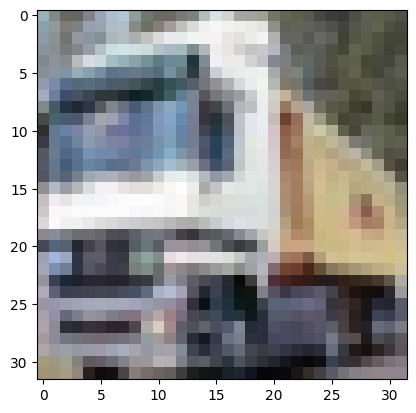

In [67]:
img = imgs[0].copy()
#img = np.transpose(img.flatten().reshape(3,32,32))
print(img[0][0])
print(img.flatten().reshape(3,32,32)[0][0])
img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
plt.imshow(img)

img2 = imgs[1].copy()
img2 = np.fliplr(np.rot90(np.transpose(img2.flatten().reshape(3,32,32)), k=-1))
plt.imshow(img2)


np.sum(np.abs(img - img2))

ind1:0, ind2:0
b'airplane'


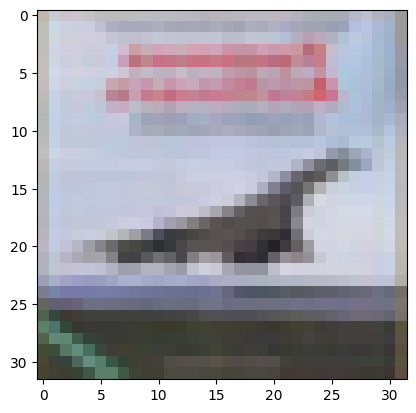

In [199]:
class NNeighbour:
    def train(self, xT, yT):
        self.xT = xT
        self.yT = yT
    def predict(self, x):
        vv = np.tile(np.array(x), (self.xT.shape[0], 1, 1, 1))
        ind = np.argmin(np.sum(np.abs(self.xT - vv), axis=(1, 2, 3)))
        return self.yT[ind]
        
    def predict2(self, x):
        res = []
        for i in range(self.xT.shape[0]):
            res.append(np.sum(np.abs(self.xT[i] - x)))
        ind = np.argmin(res)
        return self.yT[ind]


nn = NNeighbour()
nn.train(to_img_repr(data_batch_1), data_batch_1[b'labels'])
test_imgs = to_img_repr(test_batch)
test_img = test_imgs[3]
ind = nn.predict(test_img)
ind2 = nn.predict2(test_img)

print(f'ind1:{ind}, ind2:{ind2}')
print(meta[b'label_names'][ind])


# print(test_batch[b'labels'])

plt.imshow(test_img)

In [122]:
!pip install memory_profiler


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [123]:
import time
from memory_profiler import memory_usage

def f1():
    to_img_repr(data_batch_1)

def f2():
    to_img_repr_mut(data_batch_1)

# Measure time
start_time = time.time()
mem_usage = memory_usage((f1,))
end_time = time.time()

print(f"f1 Execution time: {end_time - start_time} seconds")
print(f"f1 Memory usage: {max(mem_usage) - min(mem_usage)} MiB")

start_time = time.time()
mem_usage = memory_usage((f2,))
end_time = time.time()

print(f"f2 Execution time: {end_time - start_time} seconds")
print(f"f2 Memory usage: {max(mem_usage) - min(mem_usage)} MiB")

f1 Execution time: 0.7444889545440674 seconds
f1 Memory usage: 13.953125 MiB
f2 Execution time: 0.60941481590271 seconds
f2 Memory usage: 0.296875 MiB


In [200]:
nn = NNeighbour()
nn.train(to_img_repr(data_batch_1), data_batch_1[b'labels'])
test_imgs = to_img_repr(test_batch)
res = 0
for i in range(test_imgs.shape[0]):
    if i % 1000 == 0:
        print(f'{i} of {test_imgs.shape[0]}')
    ind = nn.predict(test_imgs[i])
    exp = test_batch[b'labels'][i]
    if ind != exp:
        res += 1
print(res/test_imgs.shape[0])


0 of 10000
1000 of 10000
2000 of 10000
3000 of 10000
4000 of 10000
5000 of 10000
6000 of 10000
7000 of 10000
8000 of 10000
9000 of 10000
0.7824
